<b>Author:</b> Tiaan J.v.V\
<b>Github url:</b> \
Avocado Prices Dataset provided by Justin Kiggins on Kaggle: https://www.kaggle.com/datasets/neuromusic/avocado-prices

# 🥑2018 Avocado Price Analysis🥑

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as npy
import seaborn as seab
import matplotlib.pyplot as matplt
from scipy import stats
from scipy.stats import pearsonr

data = pd.read_excel("C:\\Users\\User\\Downloads\\avocadoXL.xlsx",sheet_name = 'avocado')

data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Data Calculations

In [7]:
Subdata = pd.read_excel("C:\\Users\\User\\Downloads\\avocadoXL.xlsx",sheet_name = 'Subtotals')

Subdata.head(10)

,Total Volume,region
0,31803.85,Boise Total
1,46419.95,Louisville Total
2,52055.73,Albany Total
3,52980.45,Jacksonville Total
4,56802.58,Spokane Total
5,67042.25,Albany Total
6,68257.73,Syracuse Total
7,72160.06,Syracuse Total
8,82886.68,GrandRapids Total
9,90182.97,NewOrleansMobile Total


In [8]:
Subdata.tail(30)

,Total Volume,region
403,9.695323e+07,Plains Total
404,1.367052e+08,Midsouth Total
405,1.459077e+08,LosAngeles Total
406,1.490397e+08,Midsouth Total
407,1.535305e+08,LosAngeles Total
408,1.582512e+08,LosAngeles Total
409,1.584715e+08,Southeast Total
410,1.585059e+08,Midsouth Total
411,1.652763e+08,GreatLakes Total
412,1.713531e+08,GreatLakes Total


In [9]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [41]:
print("Geometric mean of Total Volume: \n", stats.gmean(data.loc[2,"Total Volume"]))

Geometric mean of Total Volume: 
 118220.21999999999


# Heatmaps based on regions

C:\Users\User\AppData\Local\Temp\ipykernel_11864\724126914.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_avo = avo.corr().round(2)
C:\Users\User\AppData\Local\Temp\ipykernel_11864\724126914.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = seab.heatmap(avo.corr().round(2), annot = True,cmap = "gist_earth")


Text(0.5, 1.0, 'Heatmap of the whole US')

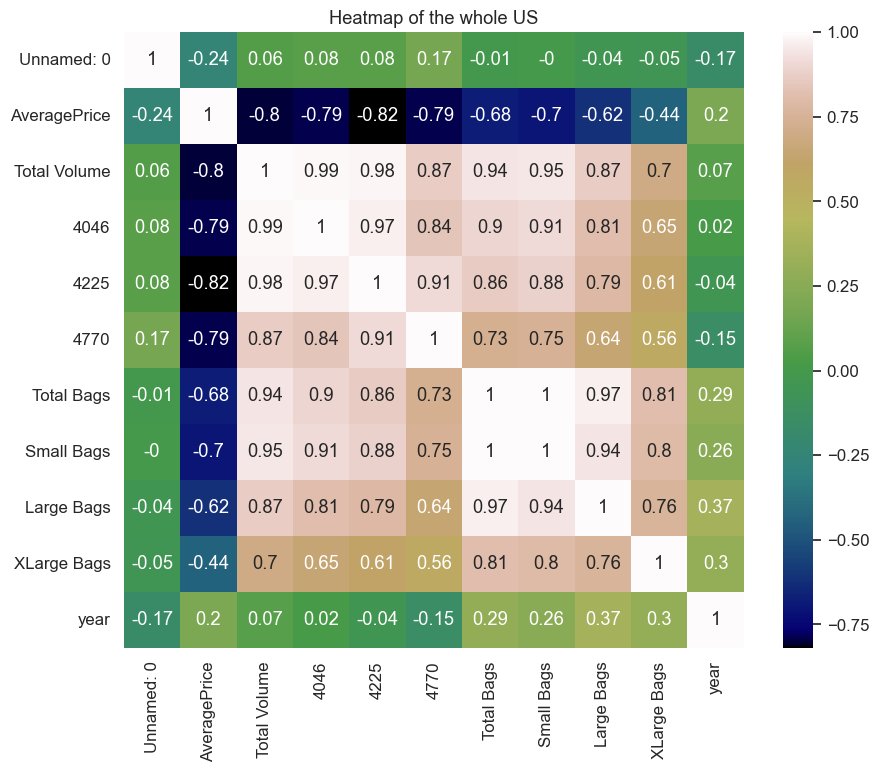

In [ ]:

avo = data.loc[data.region == "TotalUS"]

corr_mat_avo = avo.corr().round(2)
corr_mat_avo

matplt.figure(figsize=(10,8))
plot = seab.heatmap(avo.corr().round(2), annot = True,cmap = "gist_earth")
plot.set_title("Heatmap of the whole US")

C:\Users\User\AppData\Local\Temp\ipykernel_11864\2027699367.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_avo = avo.corr().round(2)
C:\Users\User\AppData\Local\Temp\ipykernel_11864\2027699367.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = seab.heatmap(avo.corr().round(2), annot = True,cmap="crest")


Text(0.5, 1.0, 'Heatmap of California')

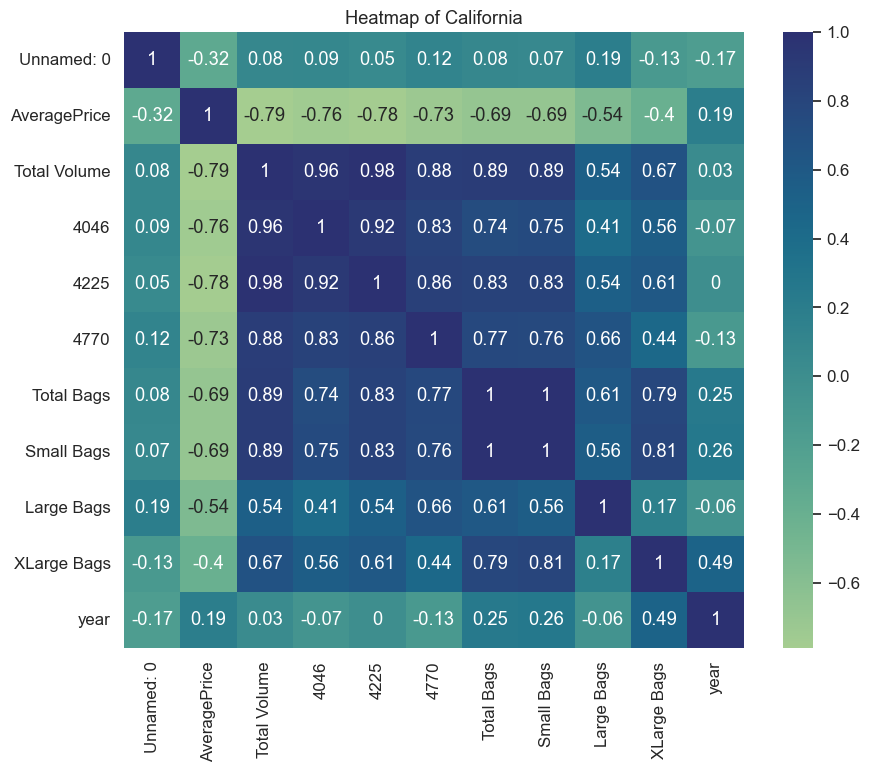

In [62]:
avo = data.loc[data.region == "California"]

corr_mat_avo = avo.corr().round(2)
corr_mat_avo

matplt.figure(figsize=(10,8))
plot = seab.heatmap(avo.corr().round(2), annot = True,cmap="crest")
plot.set_title("Heatmap of California")


C:\Users\User\AppData\Local\Temp\ipykernel_11864\2431794979.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_avo = avo.corr().round(2)
C:\Users\User\AppData\Local\Temp\ipykernel_11864\2431794979.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = seab.heatmap(avo.corr().round(2), annot = True,cmap = "gist_earth")


Text(0.5, 1.0, 'Heatmap of the New York State')

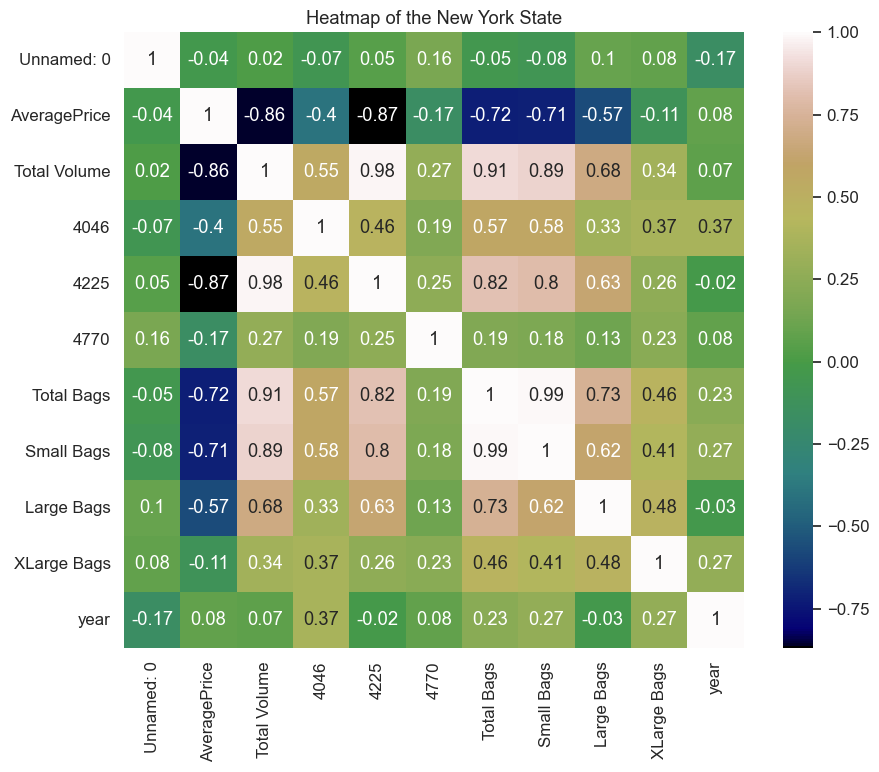

In [66]:
avo = data.loc[data.region == "NewYork"]

corr_mat_avo = avo.corr().round(2)
corr_mat_avo

matplt.figure(figsize=(10,8))
plot = seab.heatmap(avo.corr().round(2), annot = True,cmap = "gist_earth")
plot.set_title("Heatmap of the New York State")

#### <u>Analysis Notes:</u>
Avocados with PLU 4046 and 4770 code are not as inversely preportional to Average Price as compared to the other Heatmaps.
Avocados with the PLU 4770 code are not as strongly correlated as the other graphs.

(PLU = "Price Lookup")

C:\Users\User\AppData\Local\Temp\ipykernel_11864\4262212337.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_avo = avo.corr().round(2)
C:\Users\User\AppData\Local\Temp\ipykernel_11864\4262212337.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = seab.heatmap(avo.corr().round(2), annot = True,cmap = "gist_earth")


Text(0.5, 1.0, 'Heatmap of Los Angeles')

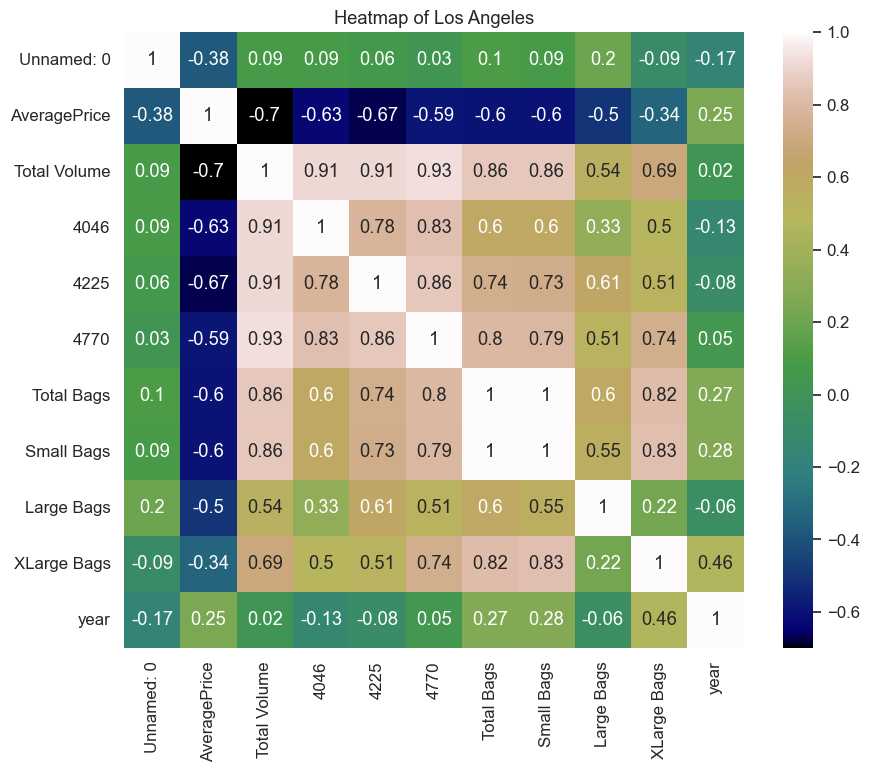

In [67]:
avo = data.loc[data.region == "LosAngeles"]

corr_mat_avo = avo.corr().round(2)
corr_mat_avo

matplt.figure(figsize=(10,8))
plot = seab.heatmap(avo.corr().round(2), annot = True,cmap = "gist_earth")
plot.set_title("Heatmap of Los Angeles")

#### <u>Analysis Notes:</u>

Los Angeles had the highest subtotal in its Volume of Avocados sold.
Interestingly, XL Bags are more correlated to year in Los Angeles (and California as well) than in the other analyzed regions.
    As the years progressed, more XL Bags were sold.
Small bags have the correlation to the total bag sales

C:\Users\User\AppData\Local\Temp\ipykernel_11864\4210171.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat_avo = avo.corr().round(2)
C:\Users\User\AppData\Local\Temp\ipykernel_11864\4210171.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = seab.heatmap(avo.corr().round(2), annot = True,cmap = "gist_earth")


Text(0.5, 1.0, 'Heatmap of Boise (Idaho)')

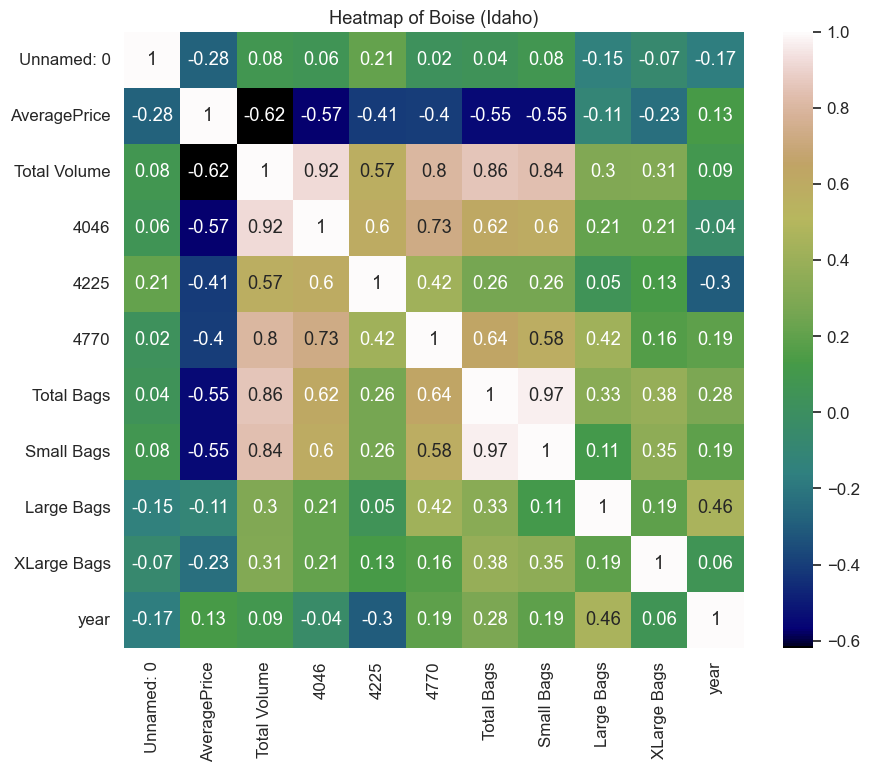

In [69]:
avo = data.loc[data.region == "Boise"]

corr_mat_avo = avo.corr().round(2)
corr_mat_avo

matplt.figure(figsize=(10,8))
plot = seab.heatmap(avo.corr().round(2), annot = True,cmap = "gist_earth")
plot.set_title("Heatmap of Boise (Idaho)")

#### <u>Analysis Notes:</u>

Boise [Idaho] had the lowest subtotal of Avos sold.
Average Price and Total Volume has the weakest correlation in Boise, the place where total volume subtotal was the lowest.




### <b><u>📝General Conclusions:📝</b></u>
\
        - Heatmaps are generally the same\
        - Average price was inversely correlated to many of the sold items.\
            - As the price increased, less customers bought them.\
            - However correlation noticeably weakend in Boise.\
            -Small bags were very (if not perfectly) correlated to the total sale of bags.

<function matplotlib.pyplot.show(close=None, block=None)>

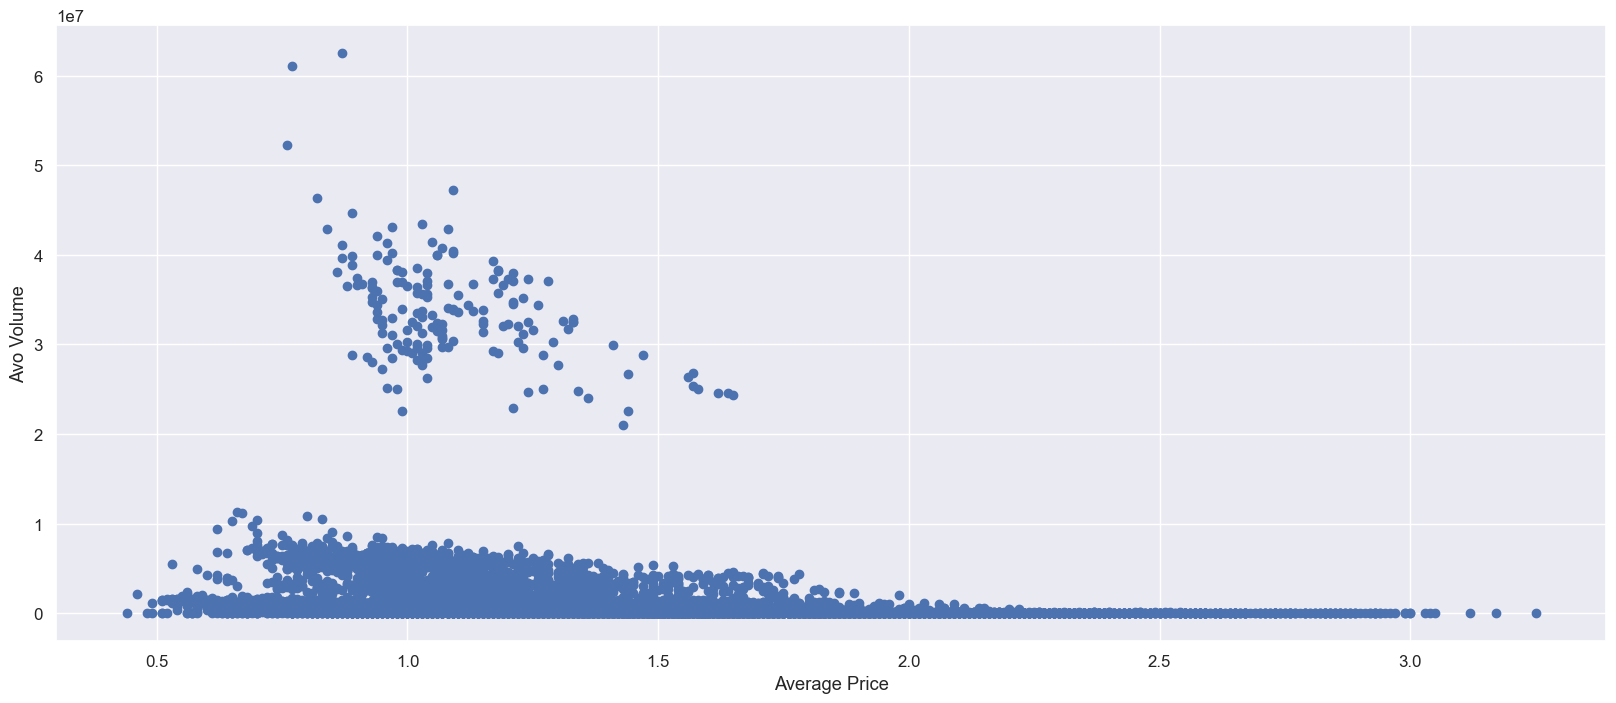

<Figure size 1000x800 with 0 Axes>

In [26]:
matplt.scatter(data['AveragePrice'], data['Total Volume'])
matplt.xlabel("Average Price")
matplt.ylabel("Avo Volume")
matplt.figure(figsize=(10,8))
matplt.show

<i>Unsurprisingly, as the average price became greater, the sales decreased.</i>\
<i>Chart is postively skewed (skewed to the right)</i>

<function matplotlib.pyplot.show(close=None, block=None)>

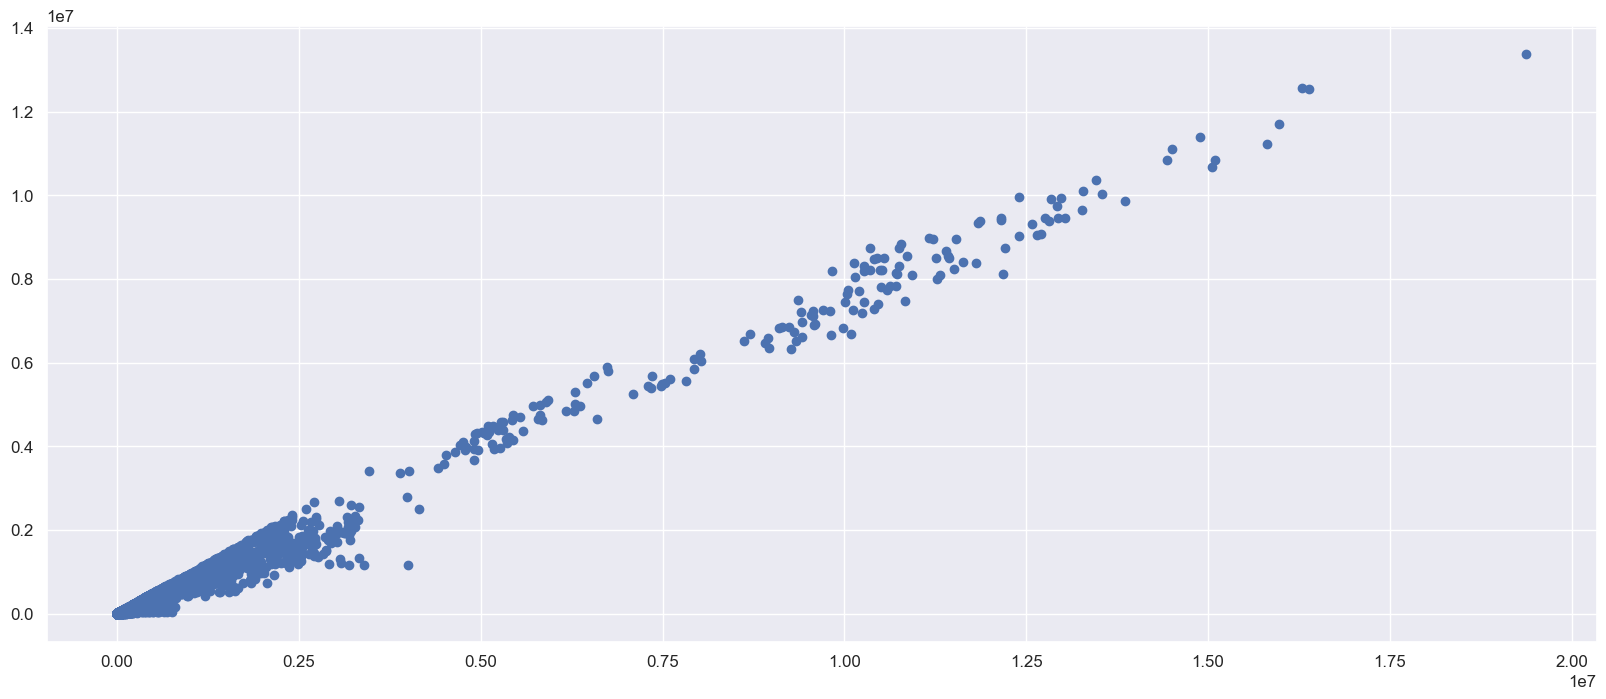

<Figure size 1000x800 with 0 Axes>

In [24]:
matplt.scatter(data['Total Bags'], data['Small Bags'])
matplt.figure(figsize=(10,8))
matplt.show

<function matplotlib.pyplot.show(close=None, block=None)>

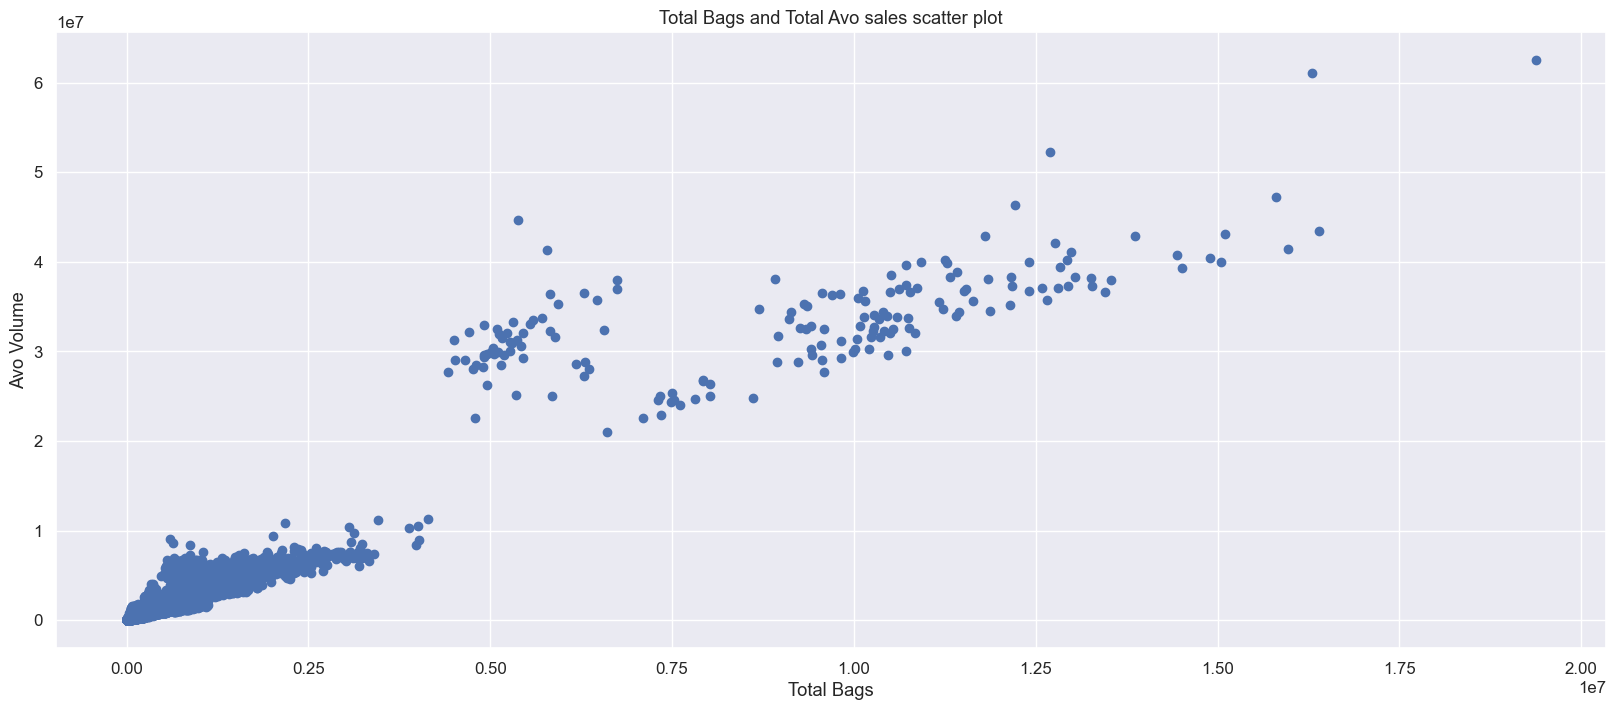

<Figure size 1000x800 with 0 Axes>

In [25]:
matplt.scatter(data['Total Bags'], data['Total Volume'])
matplt.title("Total Bags and Total Avo sales scatter plot")
matplt.xlabel("Total Bags")
matplt.ylabel("Avo Volume")
matplt.figure(figsize=(10,8))
matplt.show

<function matplotlib.pyplot.show(close=None, block=None)>

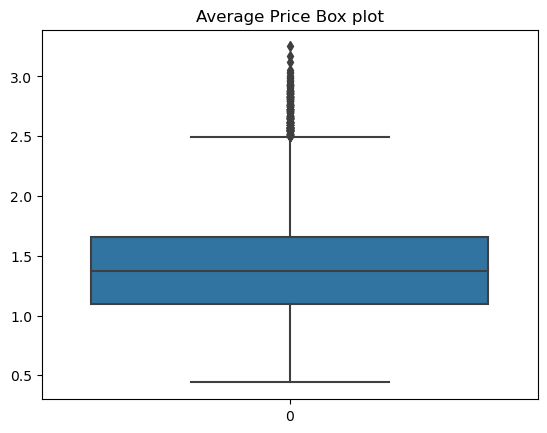

In [34]:
seab.boxplot(data["AveragePrice"])
matplt.title("Average Price Box plot")
matplt.show


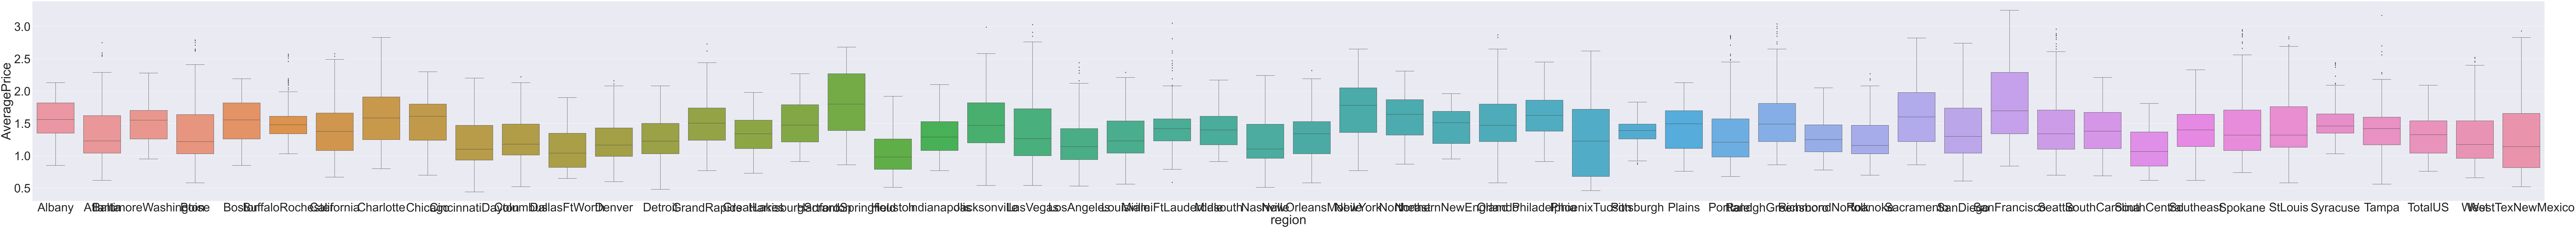

In [21]:
seab.set(rc={"figure.figsize":(250,20)},font_scale=6)
Bigbox = seab.boxplot(x="region", y="AveragePrice",data=data)

<i>Most of the boxes are positively skewed.</i>

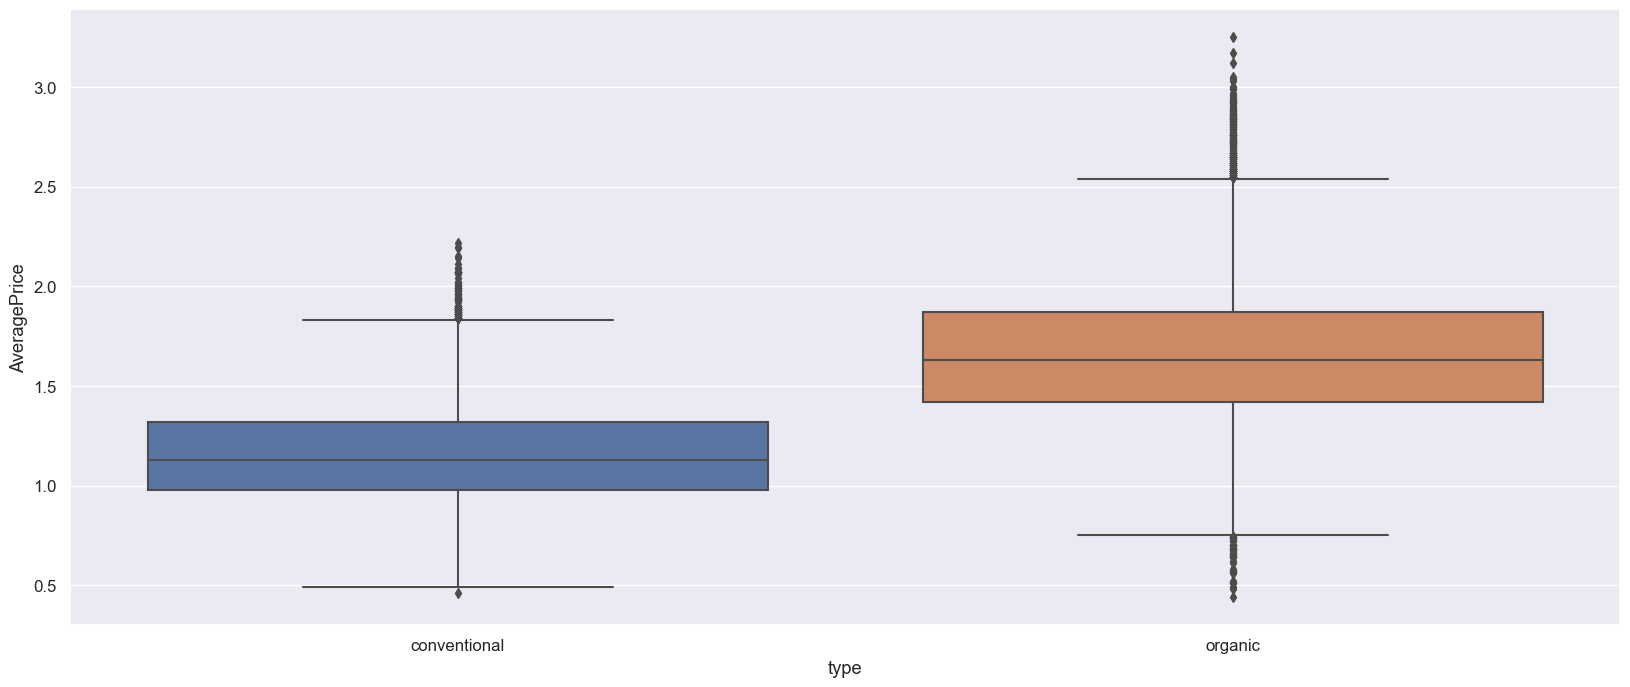

In [22]:
seab.set(rc={"figure.figsize":(20,8)},font_scale=1.1)
Bigbox = seab.boxplot(x="type", y="AveragePrice",data=data)

<i>Organic has higher percentiles in its pricing than conventional avocados.</i>\
<i>It also has more outliers, likely because there were more organic avocados sold than conventional.</i>\
\
<i>Based on observations, the boxes are quite centered but slightly skewed to the right. Whiskers are almost perfectly symmetrical.</i>

# Reflection:

To be honest I really enjoyed my time with Jupyter. I had a bit of a difficult time starting with the project. I struggled to install Jupyter through Python and pip, eventually I decided I could install it through Anaconda. Once it was set up it opened my eyes to Python  and data science.

I also struggled a bit with choosing a dataset (I wasn't so fond of the previous one,had too many errors). At first I wanted to use ChatGPT to generate a fake dataset (it would have been about Japanese tourism) and I did learn a few things about conversion of text files and CSVs to excel worksheets. I felt that the Japanese dataset wasn't comprehensive enough to work with Jupyter so then I found this avocado pricing dataset on Kaggle.

If there is an aspect of this project I should focus on improving, it is the cleaning my data. I think if I understood how to format my data better with Jupyter I could acheive even more results than what  I could find. 

As someone who works with Excel as a part-time job, it took a bit of time to get used to the structure of Jupyter. With Excel, a lot of the components are automated by the software, the user does not have to think too much if they want a simple spreadsheet. Jupyter makes you think about the data in code and in text markdowns, you slowly build your report. Jupyter's approach definitly takes longer, but you can build very specialized reports. I think I will work with both, to be prepared for potential conversion scenarios (they are very versatile tools when mastered).

I am glad I took part in this assignment, I am going to learn more about Jupyter and make even more data analytics reports. Hopefully I can choose a relevant dataset that can actually improve the current times.